# Exam (Base Notebook)

**Instructions**

- Work independently. No AI or other help was used. 
- Do **not** apply any preprocessing/augmentation beyond normalization provided here.
- Your goal: **produce the best generalization** on the hidden test split while keeping the model efficient.
- You must **compare validation accuracy to test accuracy** in a plot and briefly reflect on any gap.
- You may modify only the sections marked **Your work**. Do not change fixed cells.


## 0. Honor Statement
I, `Rolands Prohorovs`, assure that I have completed this exam independently and followed all rules.

In [1]:
# 1) Imports & Reproducibility (Fixed)
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)


TensorFlow: 2.20.0


In [2]:
# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


In [3]:
# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)


Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)


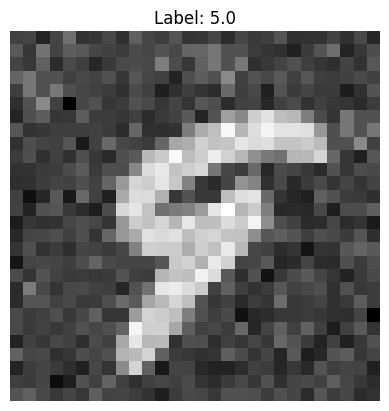

In [4]:
# 4) Quick Visual Check (Fixed)
idx = np.random.randint(0, len(X_train))
plt.imshow(X_train[idx].squeeze(), cmap='gray')
plt.title(f'Label: {y_train[idx]}')
plt.axis('off');plt.show()


## 1. Baseline Model
Check this CNN baseline. Leave as it is. Start fixing it in the next stage.

In [5]:
from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), verbose=0)
print()

## 2. Learning Curves (Fixed utility)
Plot training vs validation curves to diagnose generalization.

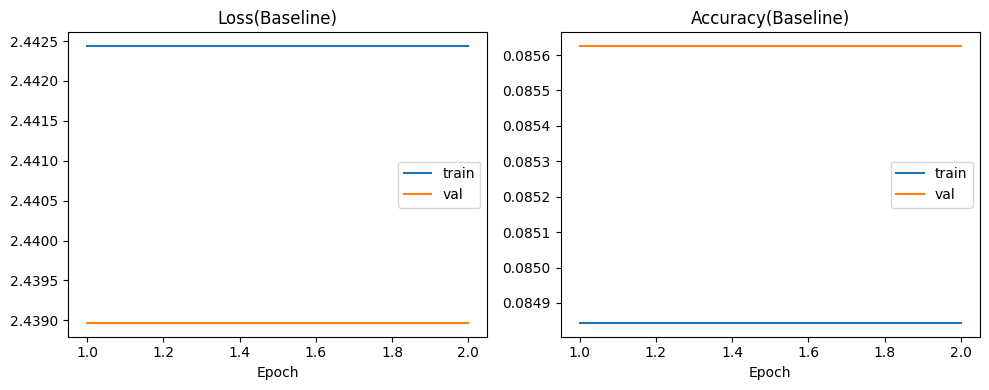

In [6]:
def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')


## 3. Validation vs Test Accuracy (Required)
Evaluate on the held-out test set and overlay the test accuracy on the validation curve. Then write a short reflection (3–5 sentences) on the generalization gap.

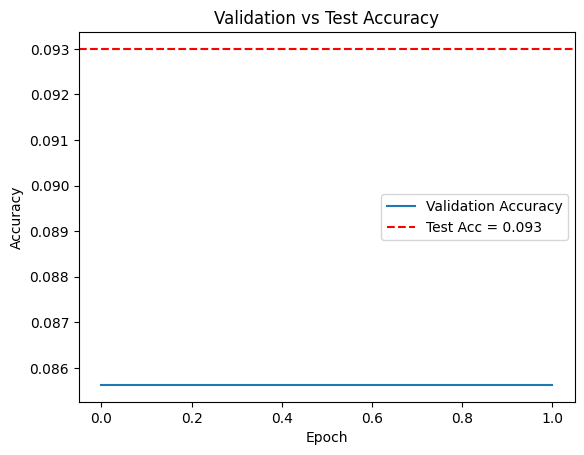

Final Test Accuracy: 0.0930


In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### Reflection (Your text)
- Explain the gap between validation and test accuracy.
    - In my case model was performing way better on the test, I had almost 55% of accuracy there, I think it is due to how data is split.
- What might cause it, and what would you try next to reduce it?
    - I would try to adding stopping automaticly, so model would choose best epoch on its own, but I coulndn't do it.
- How much of the dataset do you use for training, validation, and testing? Explain your answer with the % calculation.
    - 64% train, 16% validation and 20% testing.
- How many images are there in the original dataset?
    - 10000
- How big are the images?
    - 
- What observations can you tell about the original data?  
    - it is very very bad, because I couldn't get loss close to zero I think it shows that data is pretty bad
- What are possible labels for the images?

- What are the steps when making models?
- <b>Make sure you explain every step well!<b>
- <b>Make sure your model is as optimized as possible!<b>

## 4. Improved Model (Your work)
Build a better model, train it here as many times as you feel like and when you are pleased with it, title it `final_model`.  Report every try individually, not only the final version.

Explain every step with markdown text and code comments.   

Unrunnable code is not checked. 

In [63]:
# Your work: replace with improved model
final_model = model
final_history = history
print('Final model params:', final_model.count_params())


Final model params: 7850


TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)


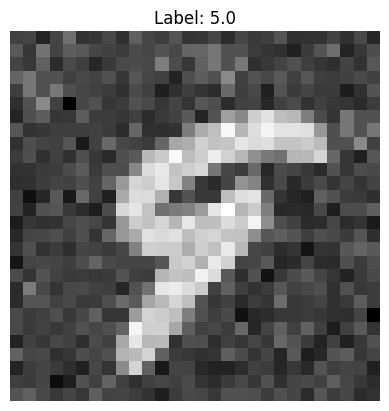

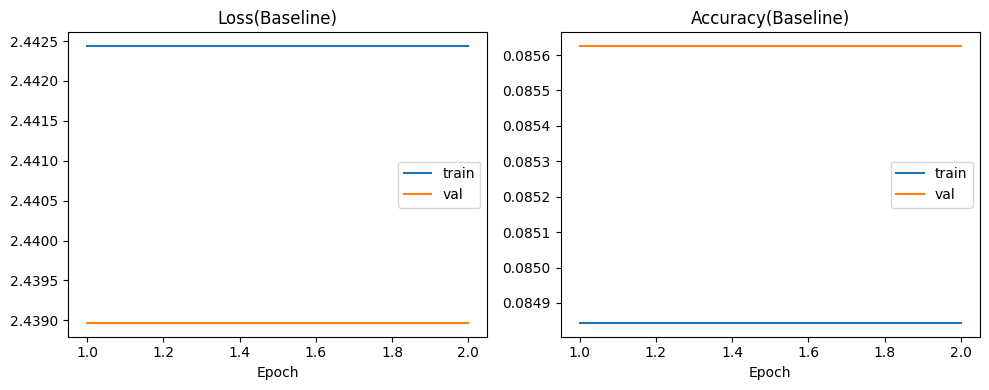

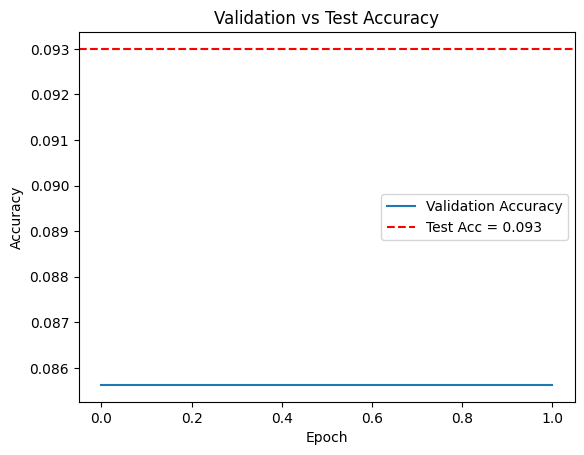

Final Test Accuracy: 0.0930


In [ ]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# 4) Quick Visual Check (Fixed)
idx = np.random.randint(0, len(X_train))
plt.imshow(X_train[idx].squeeze(), cmap='gray')
plt.title(f'Label: {y_train[idx]}')
plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### 1. Run
- First run, **accuracy is 0.09%**, it is very bad, not even 1%. 
- First I will add more epochs, now model goes through 2, I will add 3 more.  

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)


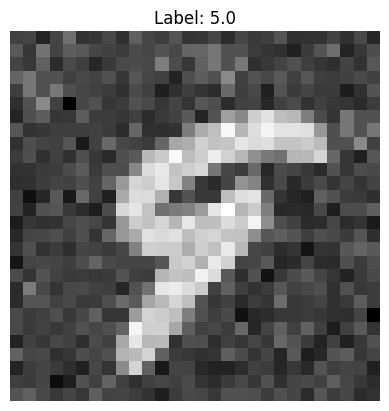

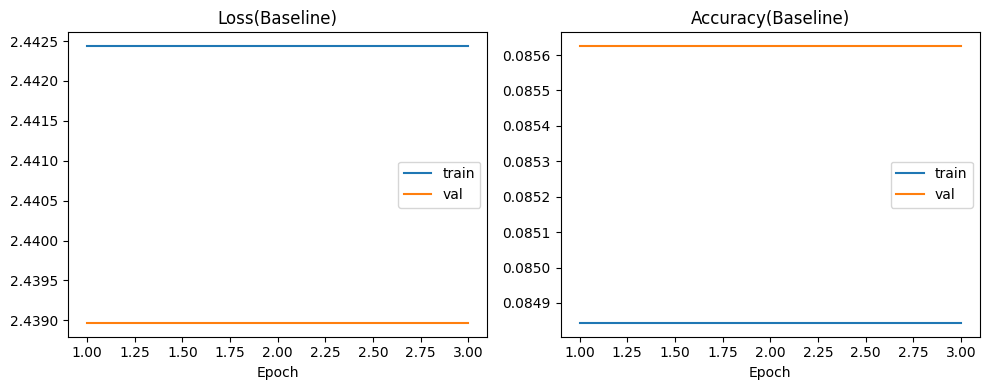

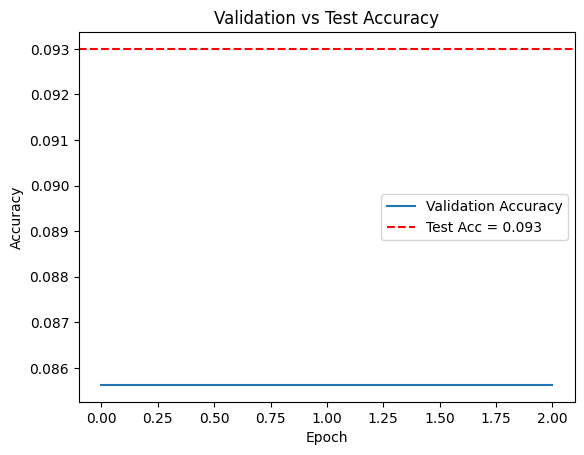

Final Test Accuracy: 0.0930


In [10]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# 4) Quick Visual Check (Fixed)
idx = np.random.randint(0, len(X_train))
plt.imshow(X_train[idx].squeeze(), cmap='gray')
plt.title(f'Label: {y_train[idx]}')
plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### 2. Run
- Based on graphs and accuracy nothing changed, maybe 5 is not enough I will try **50 epochs**. 
- But only now I have noticed that **learning rate is 0.0**. model is not learning anything, so before more epochs I will put **learning rate to 0.01**

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)


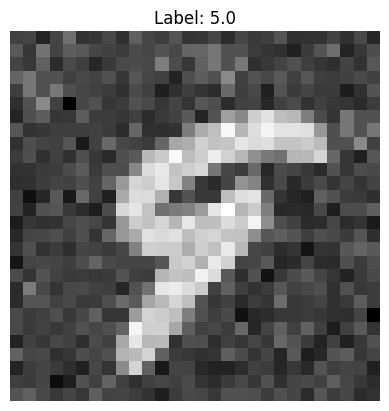

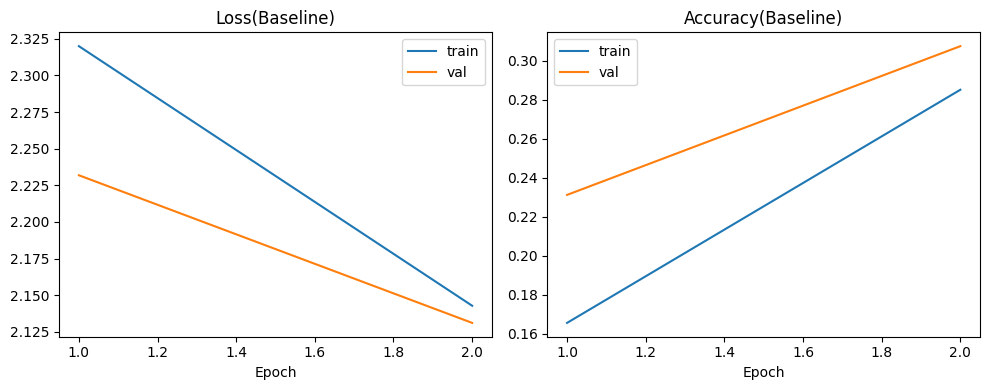

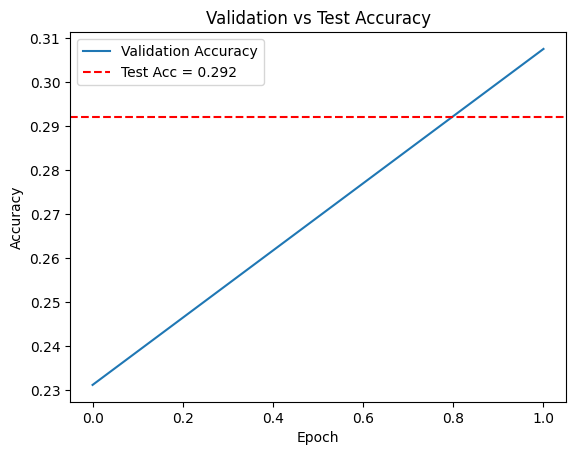

Final Test Accuracy: 0.2920


In [11]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# 4) Quick Visual Check (Fixed)
idx = np.random.randint(0, len(X_train))
plt.imshow(X_train[idx].squeeze(), cmap='gray')
plt.title(f'Label: {y_train[idx]}')
plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### 3. Run
- Great that explains why model was that bad. 
    - Firstly graphs shows that loss is going down and accuracy goes up. 
    - Now accurscy is almost 30%. That is good. 
- Next I will add more epochs, I decided to try 25 first.

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)


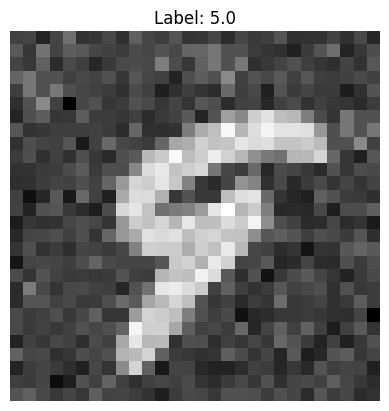

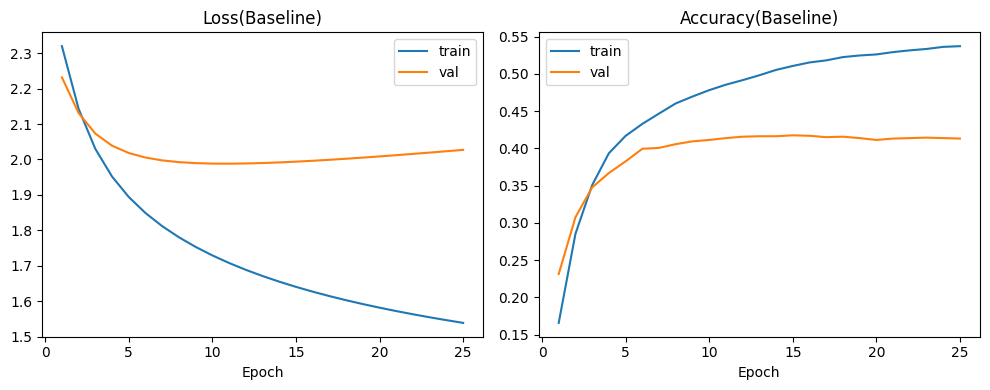

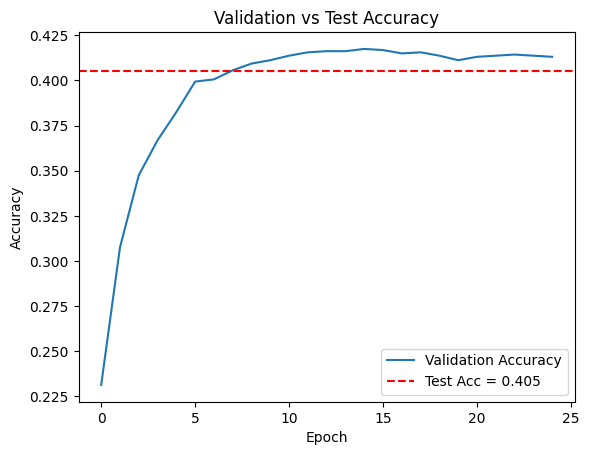

Final Test Accuracy: 0.4055


In [64]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# 4) Quick Visual Check (Fixed)
idx = np.random.randint(0, len(X_train))
plt.imshow(X_train[idx].squeeze(), cmap='gray')
plt.title(f'Label: {y_train[idx]}')
plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### 4. Run
- Amazing graphs now are smoother, and **accuracy** is 40%. 
- I also just noticed that there is only one **deep layer**. 
    - I will add two more and 
    - I will change **Dense** to 16 because ussaully it should be able to devide on 2 or 8. 
- And then if it doesn't work I will return to **epochs**.

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)


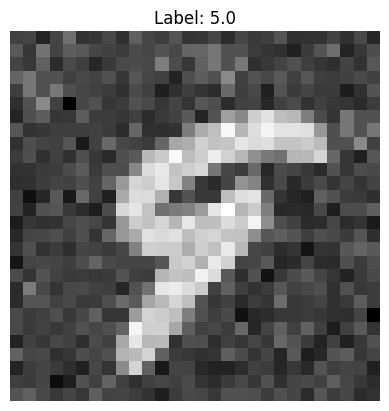

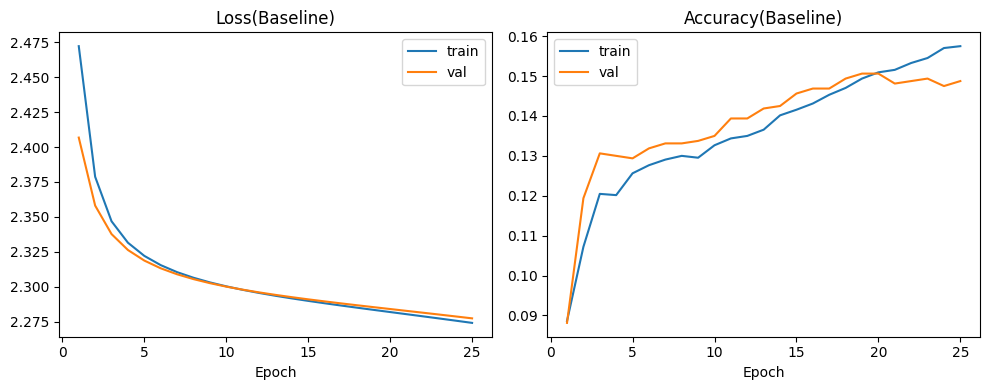

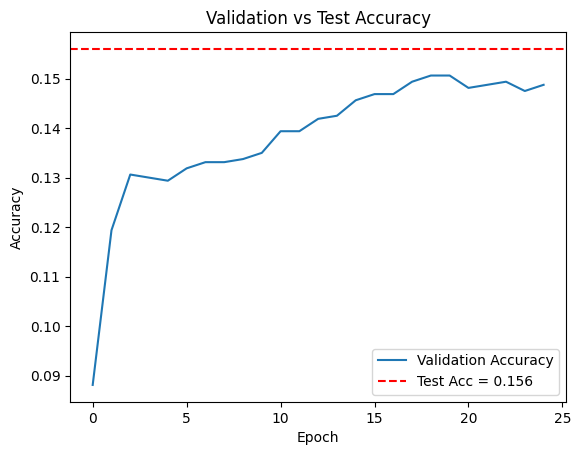

Final Test Accuracy: 0.1560


In [13]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# 4) Quick Visual Check (Fixed)
idx = np.random.randint(0, len(X_train))
plt.imshow(X_train[idx].squeeze(), cmap='gray')
plt.title(f'Label: {y_train[idx]}')
plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(12, activation='sigmoid'),
    layers.Dense(12, activation='sigmoid'),
    layers.Dense(12, activation='sigmoid'),
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### 5. Run
- oj, not what I expected:
    - **accuracy dropped** to 14 procent and **loss** incresed. 
    - But I am not sure what coused it exacly 3 deep layers should have incresed accuracy. 
    - Maybe **activation** is wrong or something like that. 
    - Also I don't see **output layer** there. In base code there is input layer and one deep. 
    - But anyway I will delete layers I have added. 
    - I will return back **epochs** and I will add 25 more so there is **50 epochs**.

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)


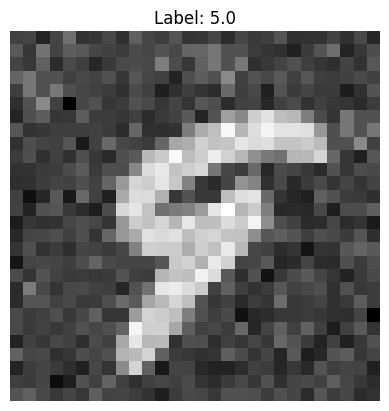

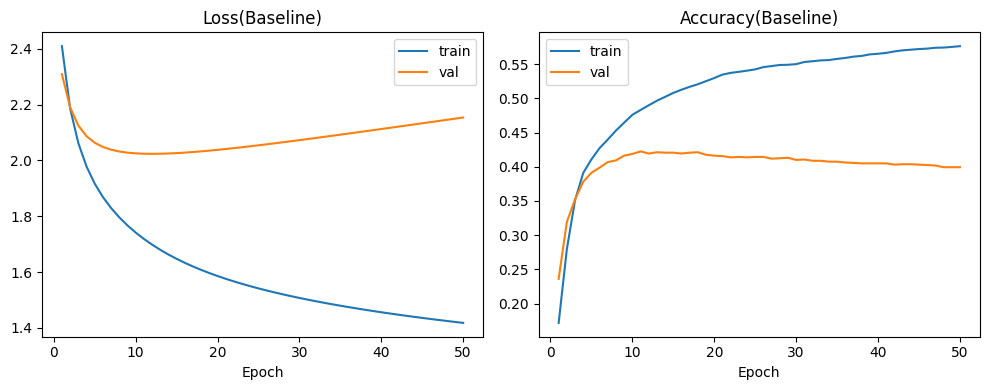

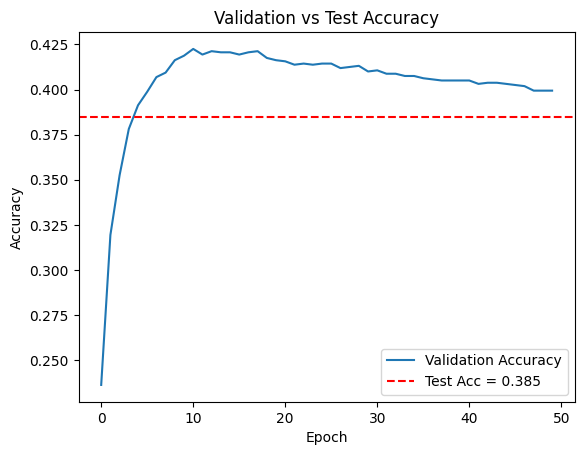

Final Test Accuracy: 0.3850


In [16]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# 4) Quick Visual Check (Fixed)
idx = np.random.randint(0, len(X_train))
plt.imshow(X_train[idx].squeeze(), cmap='gray')
plt.title(f'Label: {y_train[idx]}')
plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(12, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### 6. Run
- Adding more epochs didn't changed much:
    - actually **accuracy dropped in 2%**. 
- Let me try using another optimazer 
    - for cnn I thing **adam** optimazer should be batter.

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)


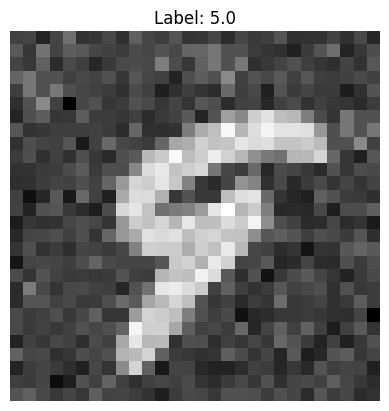

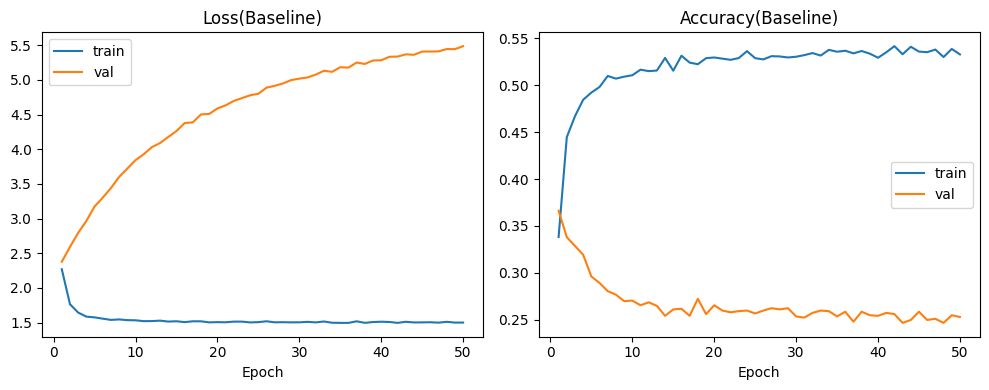

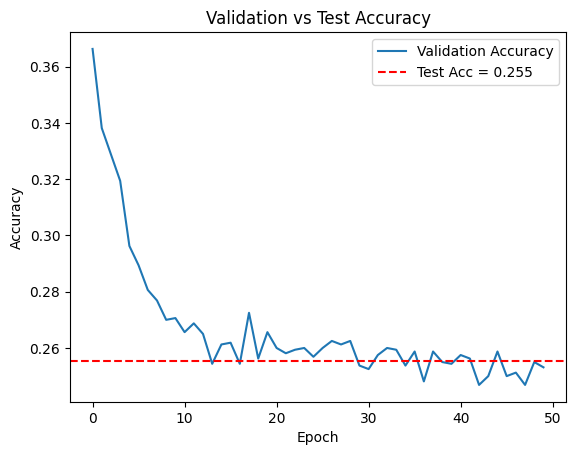

Final Test Accuracy: 0.2555


In [33]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# 4) Quick Visual Check (Fixed)
idx = np.random.randint(0, len(X_train))
plt.imshow(X_train[idx].squeeze(), cmap='gray')
plt.title(f'Label: {y_train[idx]}')
plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(12, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### 6. Run
- Something is not right:
    - on test data model got **1.5 loss**, and **accuracy was almost 55%**
    - But on validation data, accuracy dropped and loss became way more. 
- I still think that I should add more layers:
    - Again I will try to add two more layers but this time 
    - I will put **Dense** on first two 32 and on last one I will put 10. 
    - Also I will change **activation on softmax**, see what will happen

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)


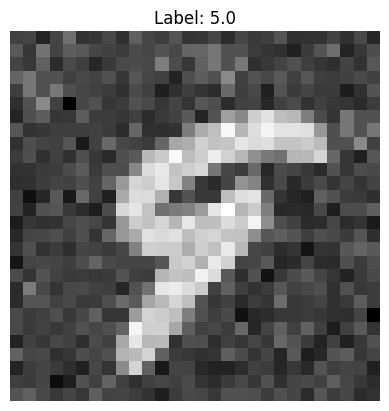

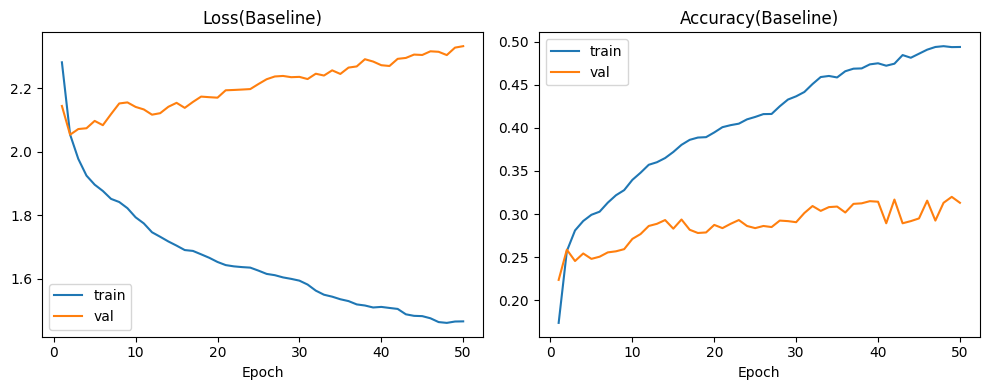

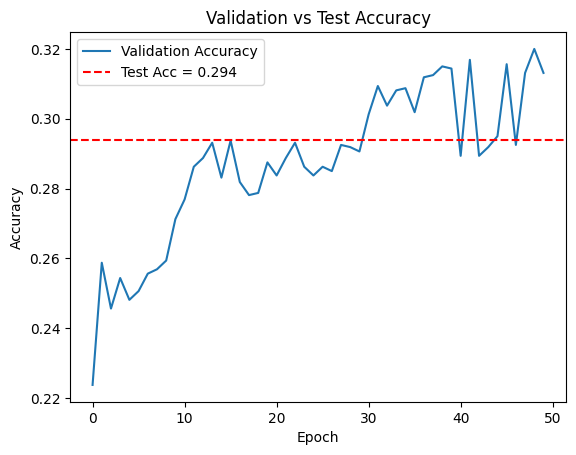

Final Test Accuracy: 0.2940


In [34]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# # 4) Quick Visual Check (Fixed)
# idx = np.random.randint(0, len(X_train))
# plt.imshow(X_train[idx].squeeze(), cmap='gray')
# plt.title(f'Label: {y_train[idx]}')
# plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(32, activation='softmax'),
    layers.Dense(32, activation='softmax'),
    layers.Dense(12, activation='softmax')
    
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### 7. Run
- i cannot understand why on train data everything goes fine but on validation, everything is bad. 
    - But this time accuracy **grown to 30%** it is good but previously I had it on 40% 
    - I play with code more. 
- Next I will try to put **learning rate to 0.05**.

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)



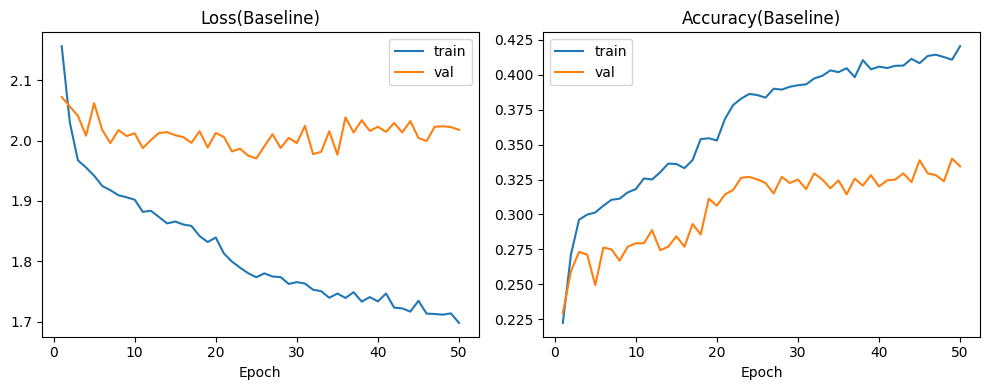

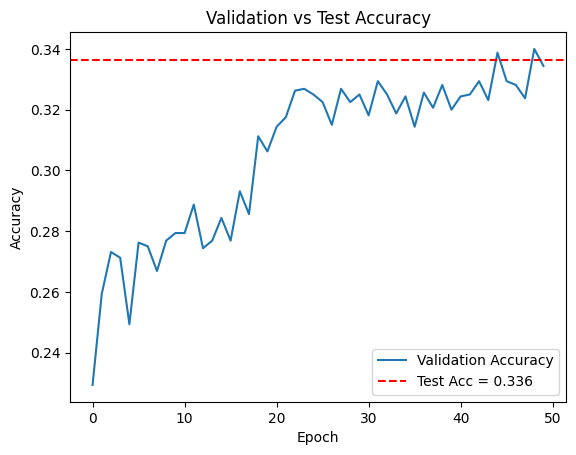

Final Test Accuracy: 0.3365


In [40]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# # 4) Quick Visual Check (Fixed)
# idx = np.random.randint(0, len(X_train))
# plt.imshow(X_train[idx].squeeze(), cmap='gray')
# plt.title(f'Label: {y_train[idx]}')
# plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(32, activation='softmax'),
    layers.Dense(32, activation='softmax'),
    layers.Dense(12, activation='softmax')
    
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### 8. Run
- it didn't changed much 
    - I will try to add **more layers**
    - put **dense to 64** this time.

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)



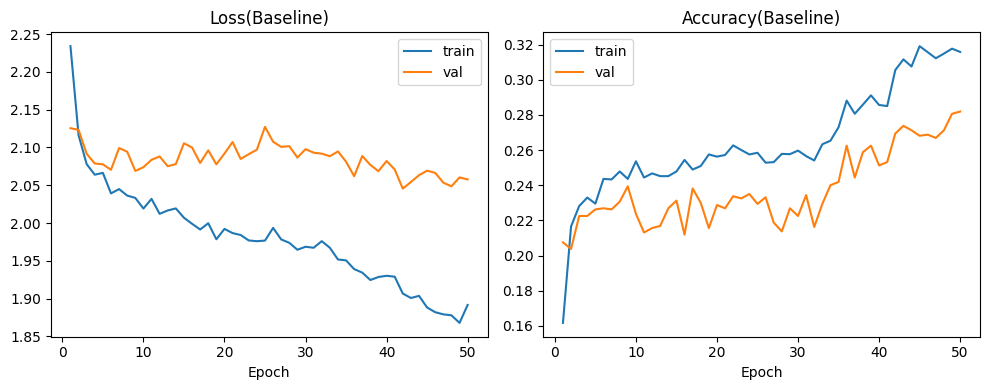

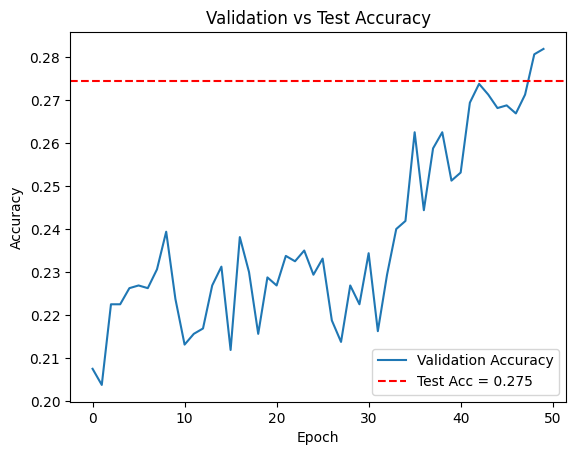

Final Test Accuracy: 0.2745


In [46]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# # 4) Quick Visual Check (Fixed)
# idx = np.random.randint(0, len(X_train))
# plt.imshow(X_train[idx].squeeze(), cmap='gray')
# plt.title(f'Label: {y_train[idx]}')
# plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='softmax'),
    layers.Dense(64, activation='softmax'),
    layers.Dense(64, activation='softmax'),
    layers.Dense(12, activation='softmax')
    
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### 9. Run
 
adding layers and puting dense to 64 also didn't helped. I will try to add more epochs again. I will add it up to 100 but so model is still efficient I will return to learning rate 0.01. And I will put verbose to 1 so I can see each epoch. 

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)
Epoch 1/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1411 - loss: 2.3595 - val_accuracy: 0.1744 - val_loss: 2.2029
Epoch 2/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1700 - loss: 2.2212 - val_accuracy: 0.1675 - val_loss: 2.2163
Epoch 3/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1666 - loss: 2.2252 - val_accuracy: 0.1800 - val_loss: 2.2103
Epoch 4/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1719 - loss: 2.2123 - val_accuracy: 0.1725 - val_loss: 2.2079
Epoch 5/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1686 - loss: 2.2140 - val_accuracy: 0.1612 - val_loss: 2.2318
Epoch 6/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1700 - loss: 2.2021 - val_accuracy: 0.1700 - val_loss: 2.2168
Epoch 7/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1772 - loss: 2.1958 - val_accuracy: 0.1669 - val_loss: 2.2222
Epoch 8/75
20

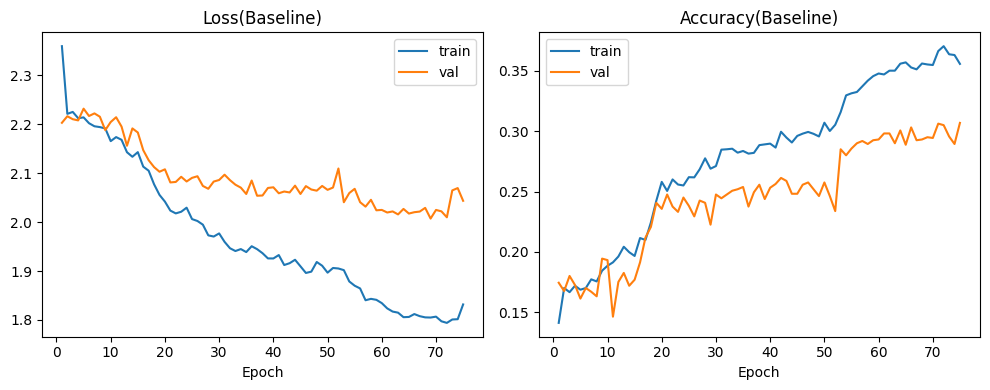

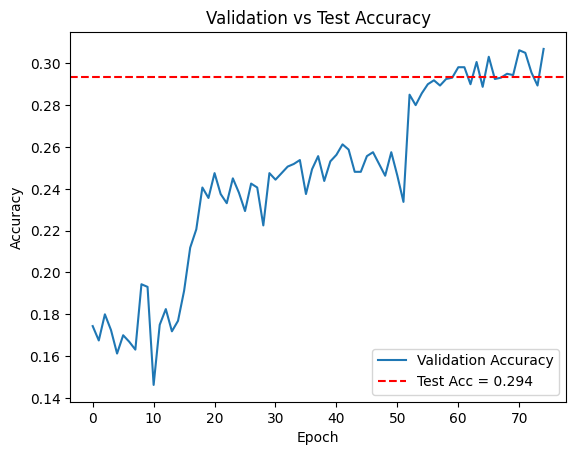

Final Test Accuracy: 0.2935


In [53]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# # 4) Quick Visual Check (Fixed)
# idx = np.random.randint(0, len(X_train))
# plt.imshow(X_train[idx].squeeze(), cmap='gray')
# plt.title(f'Label: {y_train[idx]}')
# plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='softmax'),
    layers.Dense(64, activation='softmax'),
    layers.Dense(64, activation='softmax'),
    layers.Dense(62, activation='softmax')
    
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=75, validation_data=(X_val, y_val), verbose=1)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


### 10. Run
I can't get pass 30%, I thing best decition will be to return to the model where I had 40% accuracy, I try something adding layer, epochs, learnign rate there.

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)



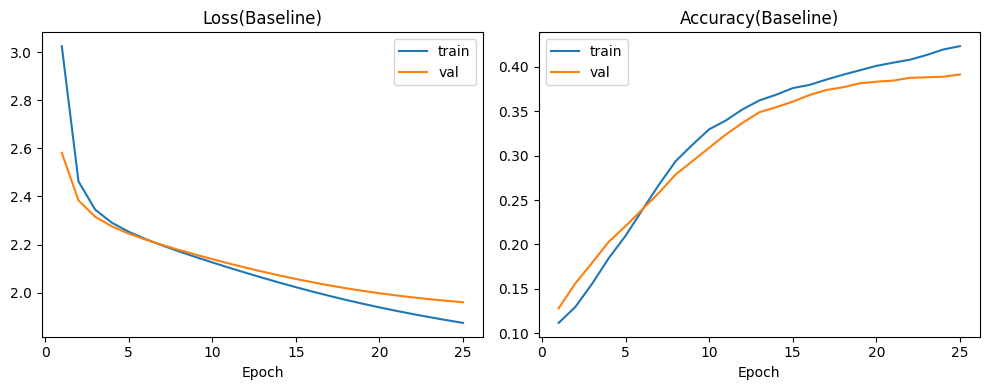

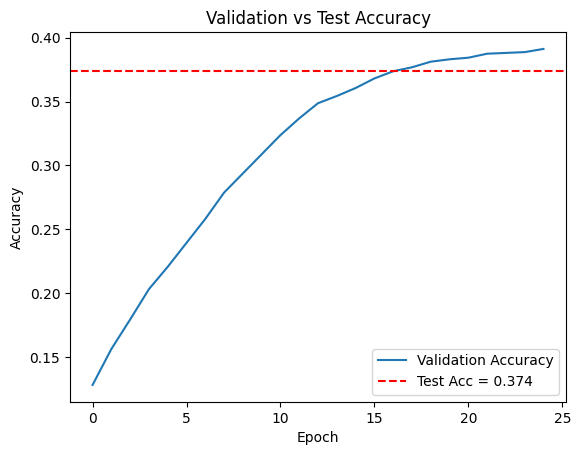

Final Test Accuracy: 0.3740


In [61]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# # 4) Quick Visual Check (Fixed)
# idx = np.random.randint(0, len(X_train))
# plt.imshow(X_train[idx].squeeze(), cmap='gray')
# plt.title(f'Label: {y_train[idx]}')
# plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


after adding layers, chnaging dense and learning rate, I still couln't pass 40% accuracy barier.

# Fixing my model after test(02.03.2026)

I have read Miras jupiter notebook with model she did. I have worte down everything she did to fix her model. And made small comparison to my work:
### My test
### zero run(accuracy: 0.09)
    - nothing
### first run(accuracy: 0.09):
    - more epochs: 5

### seconed run(accuracy:0.29): 
    - more epoch: 50
    - learning rate: from 0.0 to 0.01

### third run(accuracy: 40):
    - epochs: 25

### fourth run(accuracy: 0.15):
    - more layers: 2
    - Dense to 16

### fifth run:(accuracy: 0.38):
    - delete layers
    - add epochs: 50 

### sixsth run(accuracy: 0.29 ):
    - activation: softmax
    - more layers: 2
    - dense: 32

### seventh run(accuracy: 0.34):
    - learning rate: 0.05

### eight run(accuracy: 0.27):
    - more layers
    - Dense: 64

### ninth run(accuracy: 0.29):
    - epochs: 100
    - learning rate: 0.01
    - verbose: 1

### tenth run(accuracy: 0.37):
    - layers
    - learning rate
    - epochs

### Miras test
### preparetion:
    - cnn model
    - sparse categorical crossentropy loss funstion
    - function: softmax
    - optimazer: adam
    - learning rate: 0.01

### model 1(accuracy: 0.52):
    - plotting function

### model 2(accuracy: 0.57):
    - dropout layer

### model 3(accuracy: 0.59):
    - dropout rate: from 0.5 to 0.6

### model 4(accuracy: 0.59):
    - early stopping
    - dropout rate: back to the 0.5

### model 5 (accuracy: 0.55):
    - simpler architecture: withput dropout rate, less dense, less conv2d

### model 6(accuracy: 0.52)
    - adding dropout rate: 0.5

### model 7(accuracy: 0.59)
    - early stopping

Now I will try to implement it all to my model.

Firstly, I will add more **layers,** but this time correct ones, `Conv2D`, `MaxPooling` and `Flatten`.

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)



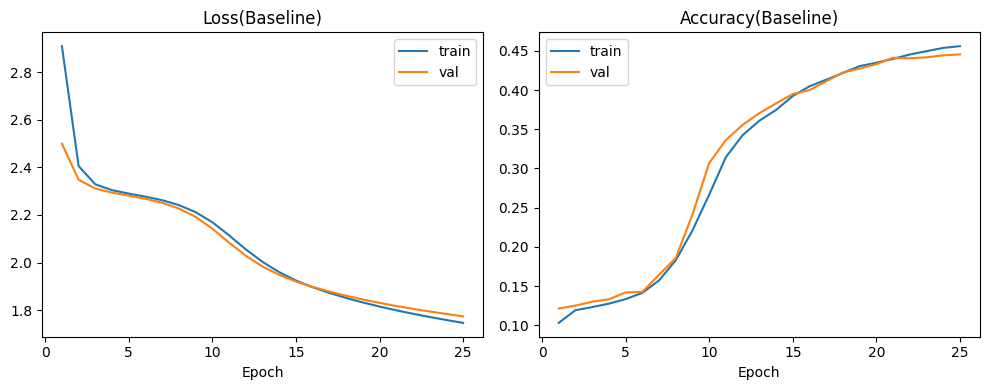

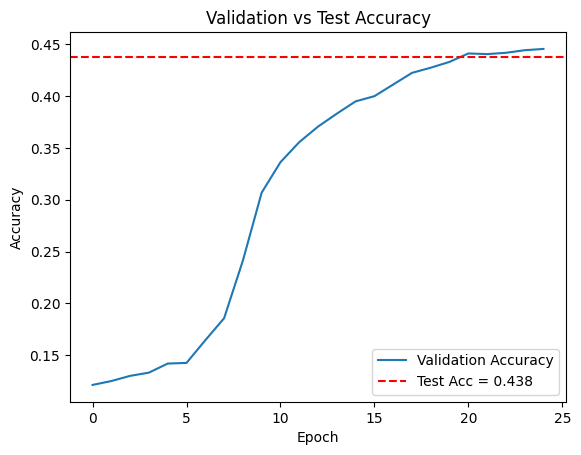

Final Test Accuracy: 0.4380


In [ ]:

# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# # 4) Quick Visual Check (Fixed)
# idx = np.random.randint(0, len(X_train))
# plt.imshow(X_train[idx].squeeze(), cmap='gray')
# plt.title(f'Label: {y_train[idx]}')
# plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')


Greate, accuracy is already **0.44%**. 
Next 
    - I will change `dense` to 128
    - I will add `dropout layer`

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)



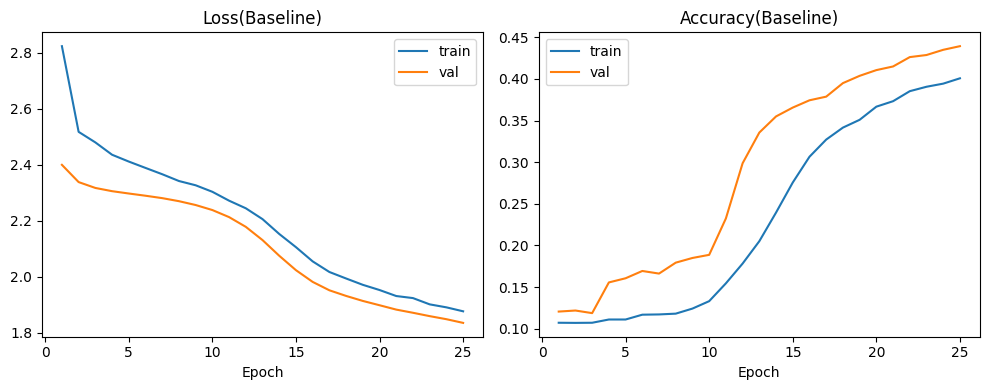

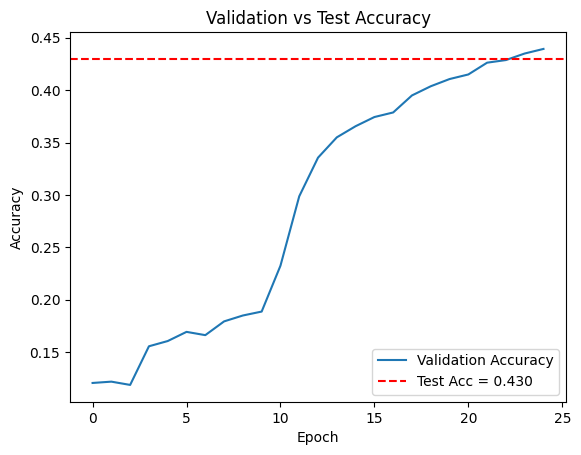

Final Test Accuracy: 0.4295


In [2]:
# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# # 4) Quick Visual Check (Fixed)
# idx = np.random.randint(0, len(X_train))
# plt.imshow(X_train[idx].squeeze(), cmap='gray')
# plt.title(f'Label: {y_train[idx]}')
# plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='sigmoid'),
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')

Accuracy still is 43%, nothing changed
I will try:
    - using activation to `relu`
    - epochs to `50`

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)



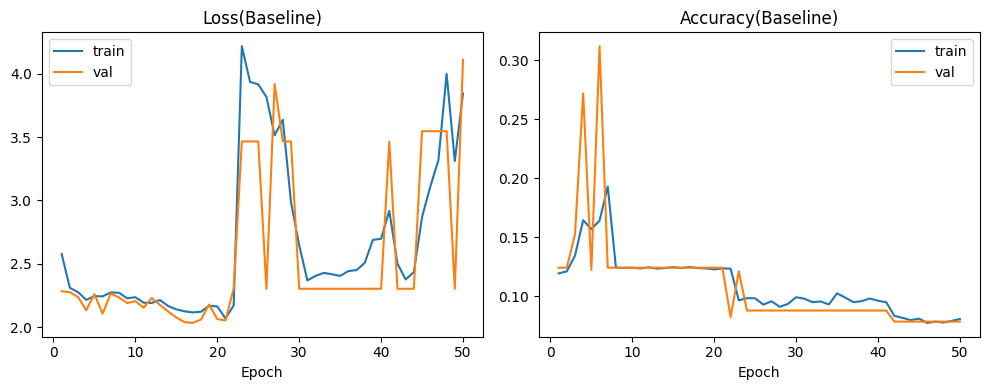

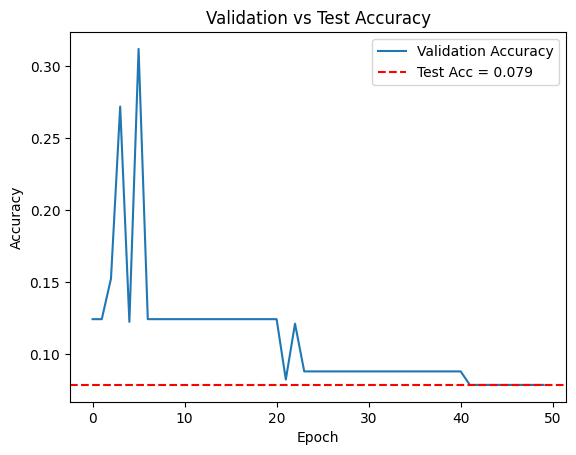

Final Test Accuracy: 0.0790


In [ ]:
# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# # 4) Quick Visual Check (Fixed)
# idx = np.random.randint(0, len(X_train))
# plt.imshow(X_train[idx].squeeze(), cmap='gray')
# plt.title(f'Label: {y_train[idx]}')
# plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')

result is completely wrong. But using Ai I have found out that I am using 10 class xlasification, but my last layer is dense(32), which makes model unstble, this explains why graph isn't smooth and changes every epoch.
I will try:
- chnaging last layer to: layers.Dense(10, activation='softmax')

TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)



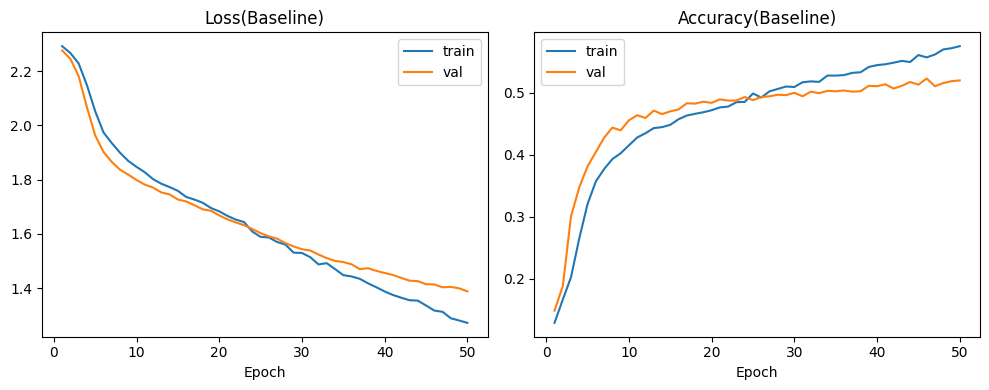

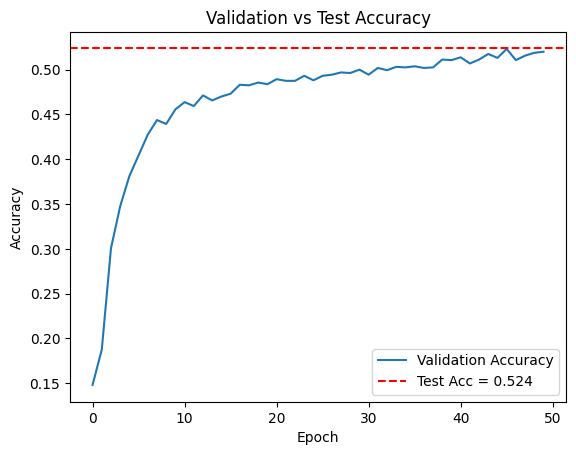

Final Test Accuracy: 0.5240


In [4]:
# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# # 4) Quick Visual Check (Fixed)
# idx = np.random.randint(0, len(X_train))
# plt.imshow(X_train[idx].squeeze(), cmap='gray')
# plt.title(f'Label: {y_train[idx]}')
# plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')

- Great, very small change, but made a lot difference, `accuraccy 52%` is good.
Next:
- I want to try to add adam optimazer
- since I will use adam optimazer I will use learning rate 0.001, since it is default one
- also I will add early stopping since on test I wanted but didn't know how 


TensorFlow: 2.20.0
Train: (6400, 28, 28, 1) Val: (1600, 28, 28, 1) Test: (2000, 28, 28, 1)



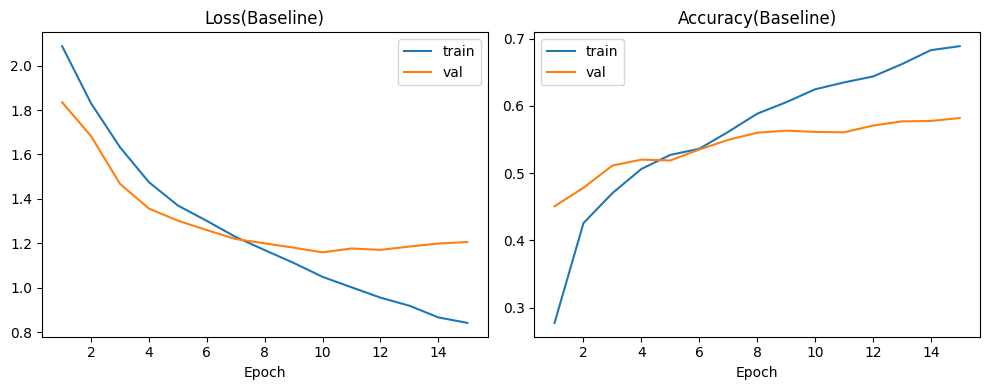

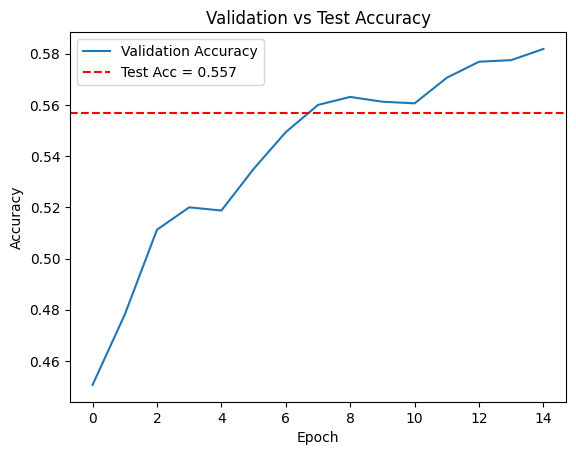

Final Test Accuracy: 0.5570


In [ ]:
# 1) Imports & Reproducibility (Fixed) - can't edit
import os, random, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
print('TensorFlow:', tf.__version__)

# 2) Load Data (Fixed)
# Expects a pickle file 'mnist.hupsista' containing (X, y) as numpy arrays.
with open('mnist.hupsista','rb') as f:
    X_all, y_all = pickle.load(f)

X_all = X_all.astype('float32')
# Normalize to [0,1]
if X_all.max() > 1.0:
    X_all /= 255.0
# Ensure channel dimension
if X_all.ndim == 3:
    X_all = X_all[..., None]

unique_labels = np.unique(y_all)


# 3) Create Train/Val/Test Splits (Fixed)
# Hold-out test once; then split train/val from the remainder.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=SEED, stratify=y_trainval
)
print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

# # 4) Quick Visual Check (Fixed)
# idx = np.random.randint(0, len(X_train))
# plt.imshow(X_train[idx].squeeze(), cmap='gray')
# plt.title(f'Label: {y_train[idx]}')
# plt.axis('off');plt.show()

# - can't edit


from tensorflow.keras import layers, models

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(10, activation='softmax'),
])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0, callbacks=[early_stop])
print()

def plot_curves(history, title_suffix=''):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train'); plt.plot(epochs, val_loss, label='val')
    plt.title(f'Loss{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='train'); plt.plot(epochs, val_acc, label='val')
    plt.title(f'Accuracy{title_suffix}'); plt.xlabel('Epoch'); plt.legend()
    plt.tight_layout(); plt.show()

plot_curves(history, '(Baseline)')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
val_acc = history.history['val_accuracy']
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(test_acc, color='r', linestyle='--', label=f'Test Acc = {test_acc:.3f}')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Validation vs Test Accuracy')
plt.legend(); plt.show()
print(f'Final Test Accuracy: {test_acc:.4f}')

Accuracy increased to `0.56`, that is good. 